<a href="https://colab.research.google.com/github/RicardoMenna/MachineLearning_TP5/blob/main/TPN%C2%B05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico N°5**
**Ejercicio: Crímenes violentos en los estados de EEUU** 

**Este conjunto de datos contiene estadísticas, en arrestos por cada 100,000 residentes por asalto, asesinato y violación en cada uno de los 50 estados de EE. UU. En 1973. También se da el porcentaje de la población que vive en áreas urbanas. El objetivo de este proyecto es identificar jerarquías de grupos de estados de EE. UU. Según los datos de tasas de delitos violentos.**

In [38]:
"""Importaciones"""
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


**Creo un DataFrame con los datos y muestro las primeras 5 filas.**

In [15]:
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
violent_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


**Muestro estadisticas descrpictivas.**

In [16]:
violent_crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


**Realizo una gráfica cruzada.**

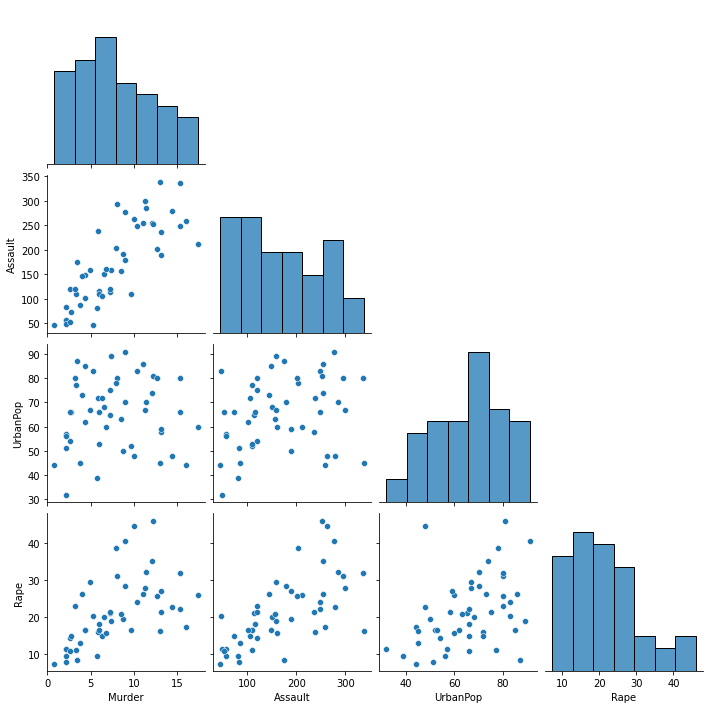

In [17]:
sns.pairplot(violent_crime, corner = True)

**Defino las entradas.**

In [25]:
X = np.array(violent_crime[["Murder","Assault","UrbanPop","Rape"]])
y = np.array(violent_crime["Unnamed: 0"])
X.shape

(50, 4)

**Hallo el valor de K haciendo una gráfica e intentando hallar el “punto de codo”.**

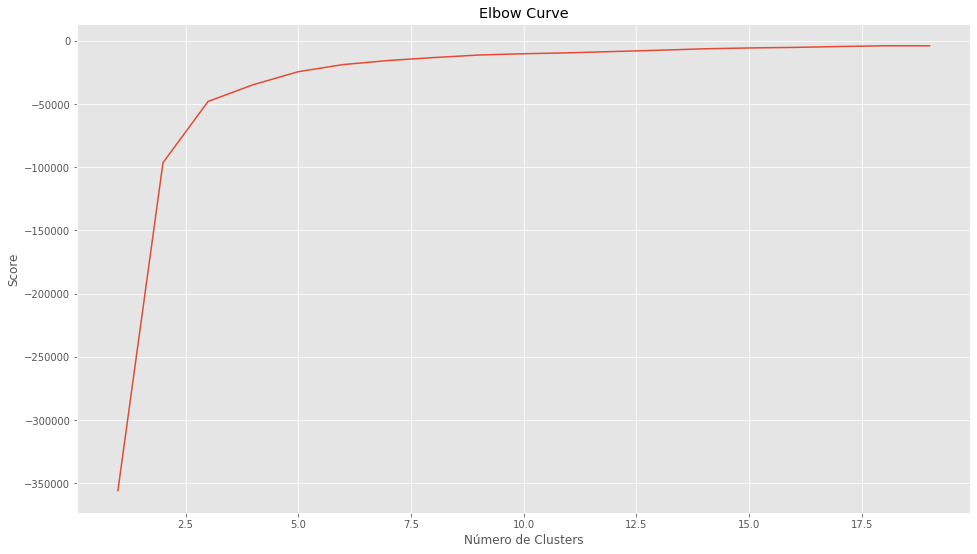

In [65]:
num_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in num_cluster]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(num_cluster,score)
plt.xlabel("Número de Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.show()

**Considero 4 un buen número para K, esto es subjetivo.**

**Obtengo las etiquetas y los centroides.**

In [68]:
kmeans = KMeans(n_clusters=4).fit(X)
centroides = kmeans.cluster_centers_
print(centroides)

[[  8.21428571 173.28571429  70.64285714  22.84285714]
 [  2.95        62.7         53.9         11.51      ]
 [ 11.8125     272.5625      68.3125      28.375     ]
 [  5.59       112.4         65.6         17.27      ]]


**Ahora veo esto en una gráfica 3D con colores para los grupos y veo si se diferencian, el signo "+" marca el centro del centroide.**

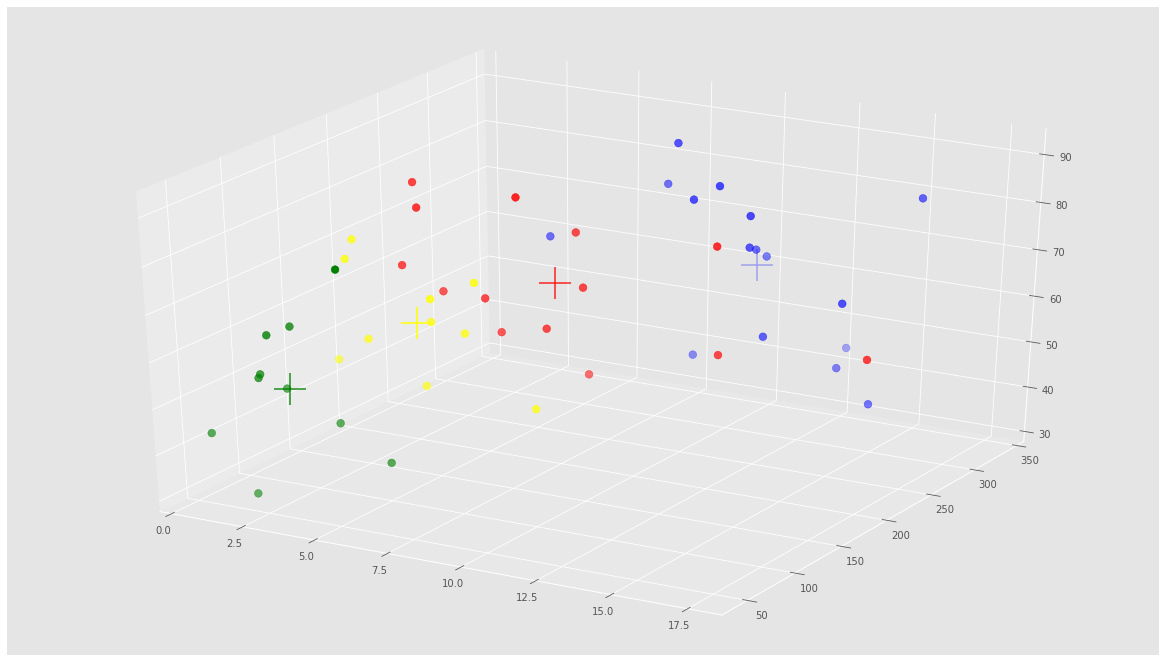

In [69]:
#Predicción de Clusters
labels = kmeans.predict(X)
#Conseguir los centros de los clusters
C = kmeans.cluster_centers_
color=["red","green","blue","yellow"]
asignar=[]
for i in labels:
    asignar.append(color[i])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker="+", c=color, s=1000)

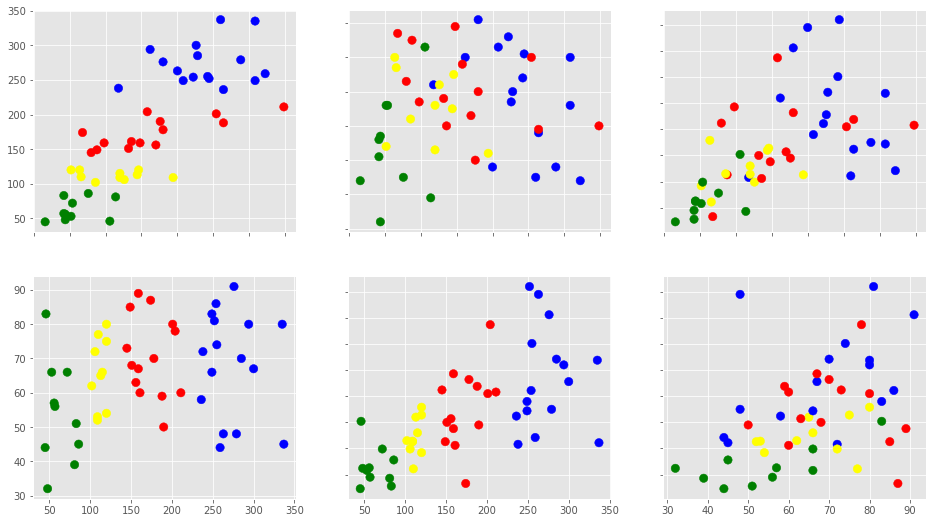

In [85]:
f1 = violent_crime["Murder"].values
f2 = violent_crime["Assault"].values
f3 = violent_crime["UrbanPop"].values
f4 = violent_crime["Rape"].values

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3)
ax1.scatter(f1, f2, c=asignar, s=70)
ax2.scatter(f1, f3, c=asignar, s=70)
ax3.scatter(f1, f4, c=asignar, s=70)
ax4.scatter(f2, f3, c=asignar, s=70)
ax5.scatter(f2, f4, c=asignar, s=70)
ax6.scatter(f3, f4, c=asignar, s=70)

for ax in fig.get_axes():
    ax.label_outer()